In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('res.csv', sep=',')
df['num_qubits'] = df['num_qubits'].astype(int)
df.replace(to_replace=["None"], value=0, inplace=True)
df.set_index('num_qubits', inplace=True)
df

,sample_probability,time_baseline_O0,time_baseline_O3,time_new_scheme_without_opt,time_new_scheme_with_opt,cx_count_baseline_O0,cx_count_baseline_O3,cx_count_without_opt,cx_count_with_opt,considered_following_qubits
num_qubits,,,,,,,,,,
5,0.3,0.015122,0.133283,0.000001,0.000001,24,24,24,24,1
5,0.3,0.154552,0.502916,0.000015,0.003206,108,84,116,100,1000
5,0.7,0.006217,0.070651,0.000008,0.001200,12,12,24,12,1
5,0.7,0.100407,0.205861,0.000018,0.002604,54,37,116,88,1000
10,0.3,0.130681,0.145823,0.000011,0.001693,99,36,54,36,1
...,...,...,...,...,...,...,...,...,...,...
100,0.7,15.692028,52.151486,0.157948,0.972274,74385,46329,72187,62041,1000
105,0.3,2.047202,4223.285571,0.000107,0.015785,1836,414,624,428,1
105,0.3,48.558056,88.995409,0.079585,0.503042,163251,80102,79129,73953,1000


In [3]:
df['time_new_scheme_with_opt'] = df['time_new_scheme_with_opt'].astype(float)
df['time_baseline_O0'] = df['time_baseline_O0'].astype(float)
df['time_baseline_O3'] = df['time_baseline_O3'].astype(float)
df['time_new_scheme_without_opt'] = df['time_new_scheme_without_opt'].astype(float)
df['cx_count_with_opt'] = df['cx_count_with_opt'].astype(int)
df['cx_count_without_opt'] = df['cx_count_without_opt'].astype(int)
df['cx_count_baseline_O0'] = df['cx_count_baseline_O0'].astype(int)
df['cx_count_baseline_O3'] = df['cx_count_baseline_O3'].astype(int)

df["time_ratio_with_opt_O0"] = df["time_new_scheme_with_opt"]/df["time_baseline_O0"]
df["time_ratio_with_opt_O3"] = df["time_new_scheme_with_opt"]/df["time_baseline_O3"]
#df["time_ratio_without_opt"] = df["time_new_scheme_without_opt"]/df["time_baseline"]
df["cx_ratio_with_opt_O0"] = df['cx_count_with_opt'].divide(df['cx_count_baseline_O0'])
df["cx_ratio_with_opt_O3"] = df['cx_count_with_opt'].divide(df['cx_count_baseline_O3'])
#df["cx_ratio_without_opt"] = df['cx_count_without_opt'].divide(df['cx_count_baseline'])
df

,sample_probability,time_baseline_O0,time_baseline_O3,time_new_scheme_without_opt,time_new_scheme_with_opt,cx_count_baseline_O0,cx_count_baseline_O3,cx_count_without_opt,cx_count_with_opt,considered_following_qubits,time_ratio_with_opt_O0,time_ratio_with_opt_O3,cx_ratio_with_opt_O0,cx_ratio_with_opt_O3
num_qubits,,,,,,,,,,,,,,
5,0.3,0.015122,0.133283,0.000001,0.000001,24,24,24,24,1,0.000079,0.000009,1.000000,1.000000
5,0.3,0.154552,0.502916,0.000015,0.003206,108,84,116,100,1000,0.020744,0.006375,0.925926,1.190476
5,0.7,0.006217,0.070651,0.000008,0.001200,12,12,24,12,1,0.192974,0.016981,1.000000,1.000000
5,0.7,0.100407,0.205861,0.000018,0.002604,54,37,116,88,1000,0.025934,0.012649,1.629630,2.378378
10,0.3,0.130681,0.145823,0.000011,0.001693,99,36,54,36,1,0.012957,0.011612,0.363636,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,0.7,15.692028,52.151486,0.157948,0.972274,74385,46329,72187,62041,1000,0.061960,0.018643,0.834053,1.339140
105,0.3,2.047202,4223.285571,0.000107,0.015785,1836,414,624,428,1,0.007711,0.000004,0.233115,1.033816
105,0.3,48.558056,88.995409,0.079585,0.503042,163251,80102,79129,73953,1000,0.010360,0.005652,0.453002,0.923235


In [4]:
#df.groupby(['considered_following_qubits', 'sample_probability'])['cx_ratio_with_opt'].plot(legend=True);

In [5]:
#df.groupby(['considered_following_qubits', 'sample_probability'])['time_ratio_with_opt'].plot(legend=True);

In [6]:
x = df#[df.considered_following_qubits==1]
x = x[x.index%5==0][[
    "considered_following_qubits",
    "sample_probability",
    "time_baseline_O0",
    "time_baseline_O3",
    "time_new_scheme_with_opt",
    "time_ratio_with_opt_O0", 
    "time_ratio_with_opt_O3", 
    "cx_count_baseline_O0", 
    "cx_count_baseline_O3", 
    "cx_count_with_opt",
    "cx_ratio_with_opt_O0",
    "cx_ratio_with_opt_O3",
]
]

x["time_baseline_O0"] = x["time_baseline_O0"].round(4)
x["time_baseline_O3"] = x["time_baseline_O3"].round(4)
x["time_new_scheme_with_opt"] = x["time_new_scheme_with_opt"].round(4)
x["cx_ratio_with_opt_O0"] = x["cx_ratio_with_opt_O0"].round(2)
x["cx_ratio_with_opt_O3"] = x["cx_ratio_with_opt_O3"].round(2)
x["time_ratio_with_opt_O0"] = x["time_ratio_with_opt_O0"].round(4)
x["time_ratio_with_opt_O3"] = x["time_ratio_with_opt_O3"].round(4)
x

,considered_following_qubits,sample_probability,time_baseline_O0,time_baseline_O3,time_new_scheme_with_opt,time_ratio_with_opt_O0,time_ratio_with_opt_O3,cx_count_baseline_O0,cx_count_baseline_O3,cx_count_with_opt,cx_ratio_with_opt_O0,cx_ratio_with_opt_O3
num_qubits,,,,,,,,,,,,
5,1,0.3,0.0151,0.1333,0.0000,0.0001,0.0000,24,24,24,1.00,1.00
5,1000,0.3,0.1546,0.5029,0.0032,0.0207,0.0064,108,84,100,0.93,1.19
5,1,0.7,0.0062,0.0707,0.0012,0.1930,0.0170,12,12,12,1.00,1.00
5,1000,0.7,0.1004,0.2059,0.0026,0.0259,0.0126,54,37,88,1.63,2.38
10,1,0.3,0.1307,0.1458,0.0017,0.0130,0.0116,99,36,36,0.36,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...
100,1000,0.7,15.6920,52.1515,0.9723,0.0620,0.0186,74385,46329,62041,0.83,1.34
105,1,0.3,2.0472,4223.2856,0.0158,0.0077,0.0000,1836,414,428,0.23,1.03
105,1000,0.3,48.5581,88.9954,0.5030,0.0104,0.0057,163251,80102,73953,0.45,0.92


In [7]:
x["Benchmark"] = "Qubits=" + x.index.astype(str) + ", p=" + x.sample_probability.astype(str)

In [8]:
x = x.sort_values(["considered_following_qubits","sample_probability", "num_qubits"])
x.set_index('Benchmark', inplace=True)
x = x.drop('sample_probability', axis=1)
x

,considered_following_qubits,time_baseline_O0,time_baseline_O3,time_new_scheme_with_opt,time_ratio_with_opt_O0,time_ratio_with_opt_O3,cx_count_baseline_O0,cx_count_baseline_O3,cx_count_with_opt,cx_ratio_with_opt_O0,cx_ratio_with_opt_O3
Benchmark,,,,,,,,,,,
"Qubits=5, p=0.3",1,0.0151,0.1333,0.0000,0.0001,0.0000,24,24,24,1.00,1.00
"Qubits=10, p=0.3",1,0.1307,0.1458,0.0017,0.0130,0.0116,99,36,36,0.36,1.00
"Qubits=15, p=0.3",1,0.0985,3.6448,0.0032,0.0328,0.0009,198,54,54,0.27,1.00
"Qubits=20, p=0.3",1,0.2577,40.1537,0.0036,0.0141,0.0001,279,72,72,0.26,1.00
"Qubits=25, p=0.3",1,0.0832,179.6633,0.0044,0.0527,0.0000,309,84,128,0.41,1.52
...,...,...,...,...,...,...,...,...,...,...,...
"Qubits=85, p=0.7",1000,11.5608,34.5206,0.9438,0.0816,0.0273,57084,33110,41124,0.72,1.24
"Qubits=90, p=0.7",1000,16.0592,34.0349,1.1462,0.0714,0.0337,62802,37228,49964,0.80,1.34
"Qubits=95, p=0.7",1000,12.5089,36.7097,0.9066,0.0725,0.0247,67590,41510,55742,0.82,1.34


In [9]:
x = x.rename(columns={"time_ratio_with_opt_O0": "Time Ratio O0", 
                      "time_ratio_with_opt_O3": "Time Ratio O3", 
                      "cx_count_baseline_O0": "CX Count Baseline O0",
                      "cx_count_baseline_O3": "CX Count Baseline O3", 
                      "cx_count_with_opt": "CX Count New Scheme", 
                      "cx_ratio_with_opt_O0": "CX Count Ratio O0", 
                      "cx_ratio_with_opt_O3": "CX Count Ratio O3", 
                      "time_new_scheme_with_opt":"Time New Scheme", 
                      "time_baseline_O0":"Time Baseline O0",
                      "time_baseline_O3":"Time Baseline O3"
                     }
            )

In [10]:
print(x.to_latex())

\begin{tabular}{lrrrrrrrrrrr}
\toprule
{} &  considered\_following\_qubits &  Time Baseline O0 &  Time Baseline O3 &  Time New Scheme &  Time Ratio O0 &  Time Ratio O3 &  CX Count Baseline O0 &  CX Count Baseline O3 &  CX Count New Scheme &  CX Count Ratio O0 &  CX Count Ratio O3 \\
Benchmark         &                              &                   &                   &                  &                &                &                       &                       &                      &                    &                    \\
\midrule
Qubits=5, p=0.3   &                            1 &            0.0151 &            0.1333 &           0.0000 &         0.0001 &         0.0000 &                    24 &                    24 &                   24 &               1.00 &               1.00 \\
Qubits=10, p=0.3  &                            1 &            0.1307 &            0.1458 &           0.0017 &         0.0130 &         0.0116 &                    99 &                    36 &

/var/folders/f4/n3_mnvbd6q50h0gtzy84vyn40000gn/T/ipykernel_50950/3852788053.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(x.to_latex())


# Graph Trial

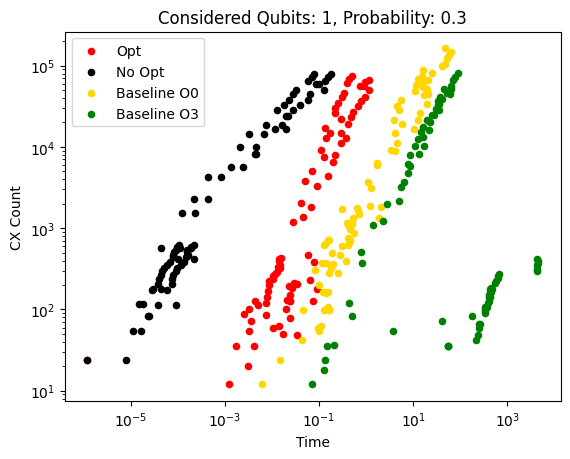

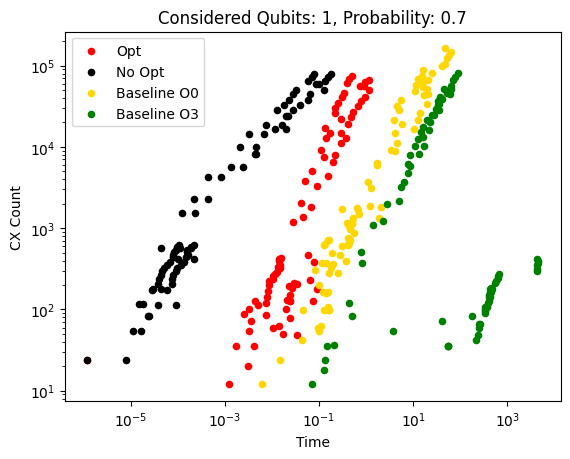

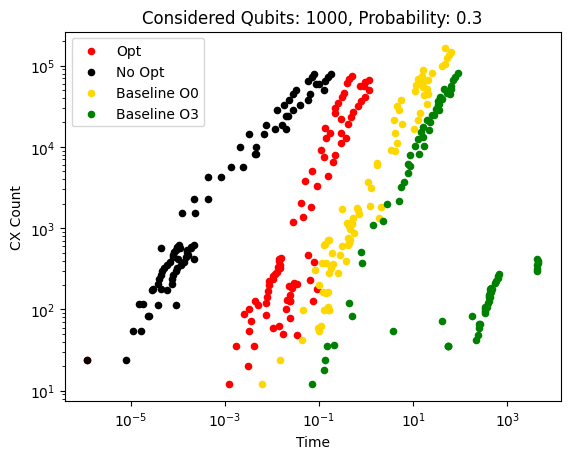

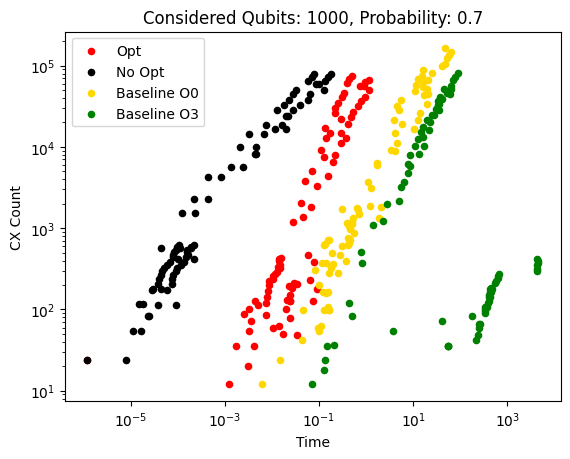

In [41]:
for considered_following_qubits in [1,1000]:
    for sample_probability in [0.3,0.7]:
        df_new = df[df.considered_following_qubits==1000]
        df_new = df_new[df_new.sample_probability==0.3]

        ax1 = df.plot(kind='scatter', x='time_new_scheme_with_opt', y='cx_count_with_opt', color='r', label="Opt")   
        ax2 = df.plot(kind='scatter', x='time_new_scheme_without_opt', y='cx_count_without_opt', color='black', ax=ax1, label="No Opt")    
        ax3 = df.plot(kind='scatter', x='time_baseline_O0', y='cx_count_baseline_O0', color='gold', ax=ax1, label="Baseline O0")
        ax4 = df.plot(kind='scatter', x='time_baseline_O3', y='cx_count_baseline_O3', color='green', ax=ax1, label="Baseline O3") 
        
        plt.xlabel("Time")
        plt.ylabel("CX Count")
        plt.xscale("log")
        plt.yscale("log")
        plt.legend()
        plt.title("Considered Qubits: " + str(considered_following_qubits) + ", Probability: " + str(sample_probability))
        plt.show()